In [5]:
import strax
import amstrax
import matplotlib.pyplot as plt
import numpy as np
import glob

Nu definieren we onze context. In de context staat waar de data staat, wat er allemaal in staat. Dat soort dingen

In [2]:
ax = amstrax.contexts.amstrax_run10_analysis(output_folder='/Volumes/Extreme SSD/strax_data')

Nu moeten we een lijst van de runs maken die we allemaal hebben. De names van de runs bestaat uit twee delen. 
Het eerste deel is het tijdstip waarop de run is begonnen. Het tweede gedeelte is van welke digitizer de data afkomstig is.
We hebben er twee, een 1724 (https://www.caen.it/products/v1724/) en een 1730 (https://www.caen.it/products/v1730/)
De 1724 heeft de Photomultiplier tube (PMT) erop aangesloten die aan de onderkant van onze TPC zit. In de 1730 zitten 7 Silicon photo multipliers (SiPM)

In [17]:
run_ids = list(set([r[32:50] for r in glob.glob('/Volumes/Extreme SSD/strax_data/*')]))

Nu kunnen we om data gaan vragen. Om te zien wat er allemaal is vragen we aan de context:

In [19]:
ax._plugin_class_registry

{'records': amstrax.pulse_processing.PulseProcessing,
 'pulse_counts': amstrax.pulse_processing.PulseProcessing,
 'hits': amstrax.peak_processing.Hits,
 'n_competing_bottom': amstrax.peak_processing.NCompetingBottom,
 'n_competing_top': amstrax.peak_processing.NCompetingTop,
 'peak_basics_bottom': amstrax.peak_processing.PeakBasicsBottom,
 'peak_basics_top': amstrax.peak_processing.PeakBasicsTop,
 'peak_classification_bottom': amstrax.peak_processing.PeakClassificationBottom,
 'peak_classification_top': amstrax.peak_processing.PeakClassificationTop,
 'peak_positions': amstrax.peak_processing.PeakPositions,
 'peaks_top': amstrax.peak_processing.Peaks,
 'peaks_bottom': amstrax.peak_processing.Peaks,
 'events': amstrax.event_processing.Events,
 'raw_records': amstrax.pax_interface.RecordsFromPax}

De eerste. waarde is de plugin die er is, de tweede is waar de definitie is. Er is steeds een top/bottom splitsing die in dit geval heel overbodig is, aangezien de splitng nu al gebeurt is per run (Hint: misschien kan dit beter)

Om te zien wat er is zo'n plugin staat doen we dit:

In [24]:
ax.data_info('raw_records')

/Users/petergaemers/Desktop/python/strax/strax/context.py:445: UserWarning: Option channel_map not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")


,Field name,Data type,Comment
0,time,int64,Start time since unix epoch [ns]
1,length,int32,Length of the interval in samples
2,dt,int16,Width of one sample [ns]
3,channel,int16,Channel/PMT number
4,pulse_length,int32,Length of pulse to which the record belongs (w...
5,record_i,int16,Fragment number in the pulse
6,baseline,int16,Baseline determined by the digitizer (if this ...
7,data,"('<i2', (110,))",Waveform data in raw ADC counts


Als we naar deze data willen kijken

In [25]:
records = ax.get_array(run_ids[5],'raw_records')

/Users/petergaemers/Desktop/python/strax/strax/context.py:445: UserWarning: Option channel_map not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
|██████████| 100.00 % [00:00<00:00], Rate last Chunk: 0.00 s/chunk, #chunks processed: 385


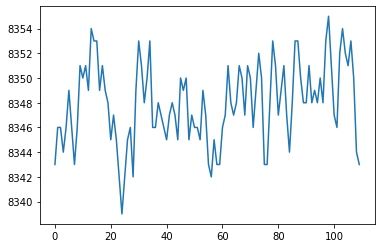

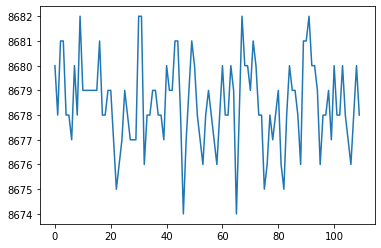

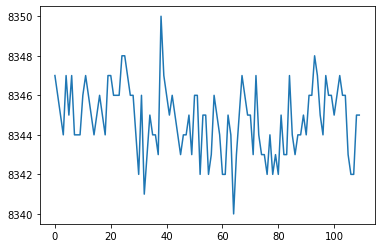

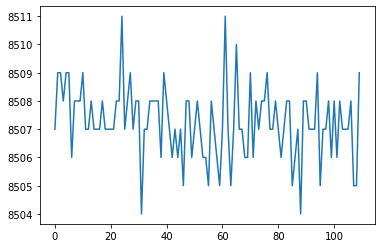

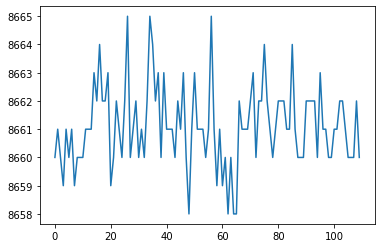

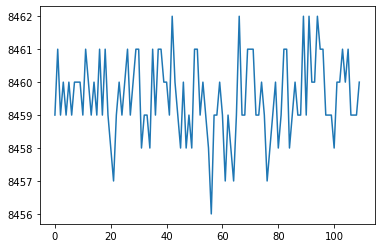

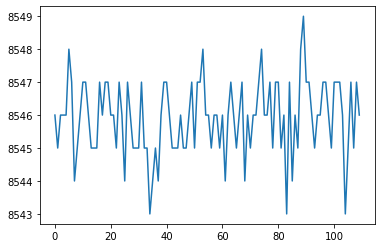

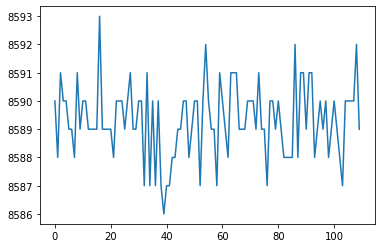

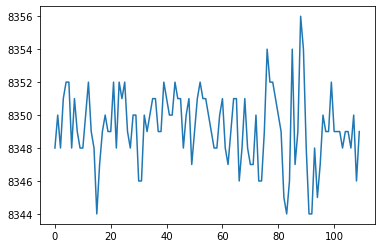

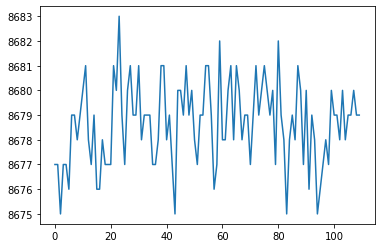

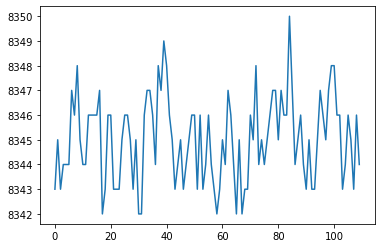

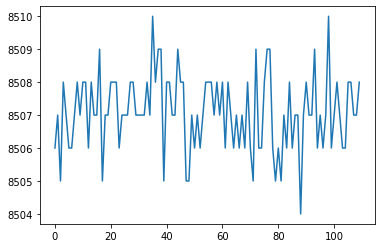

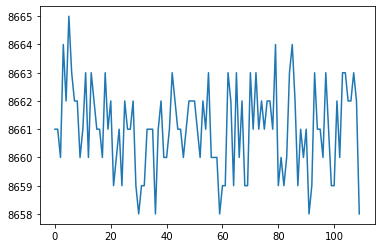

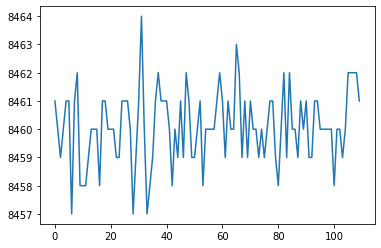

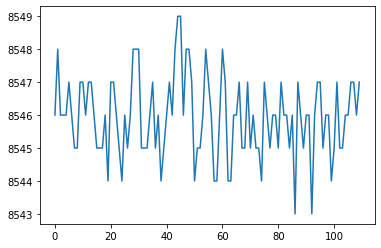

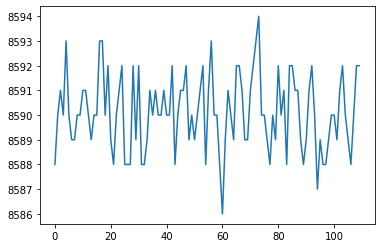

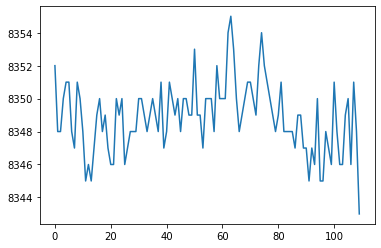

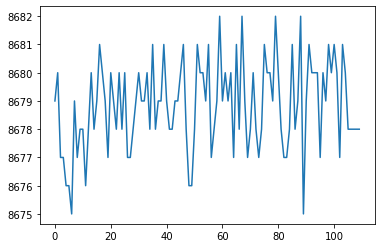

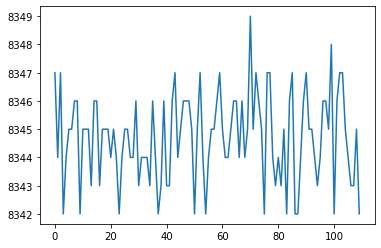

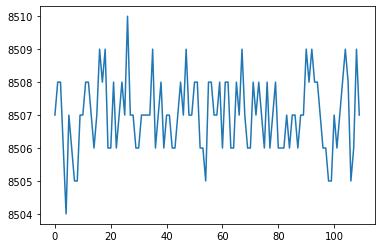

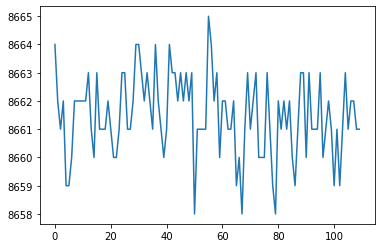

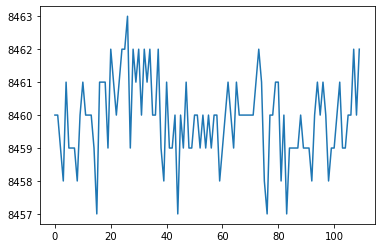

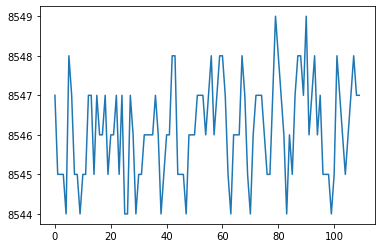

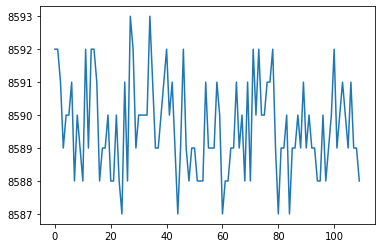

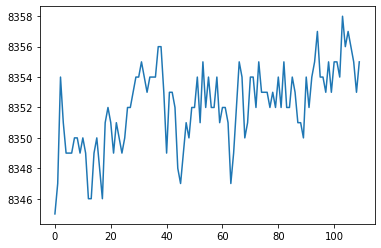

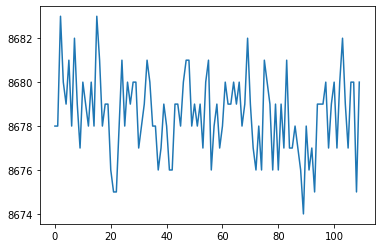

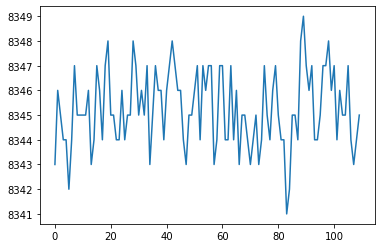

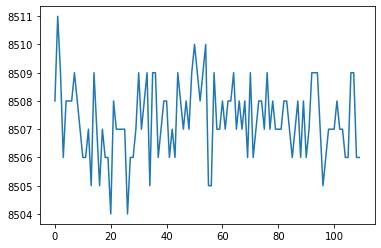

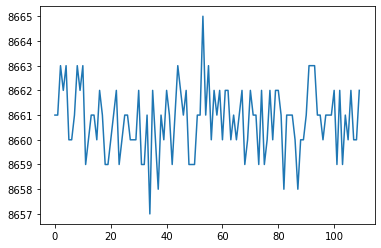

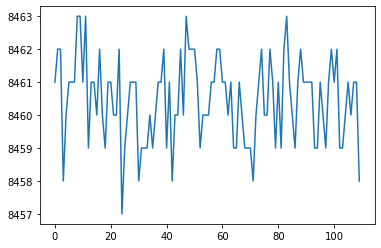

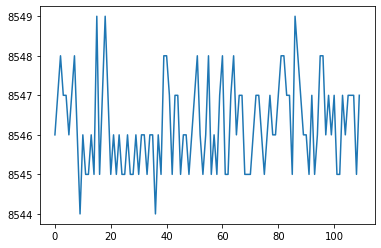

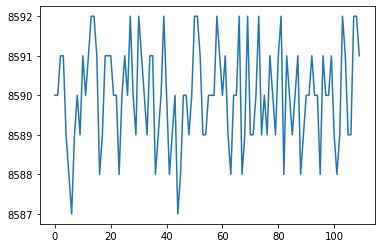

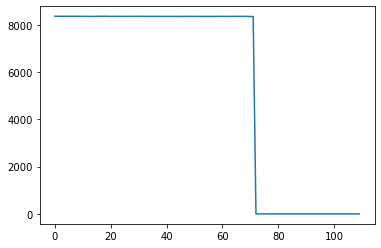

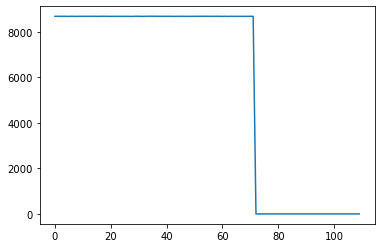

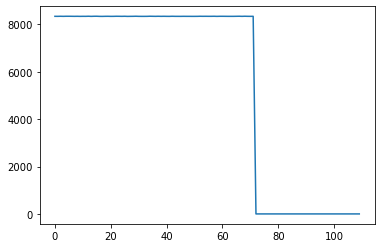

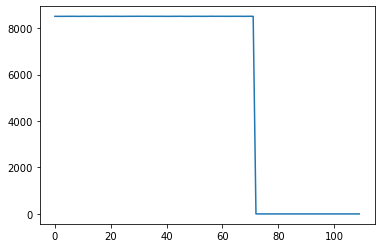

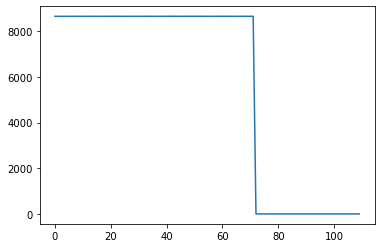

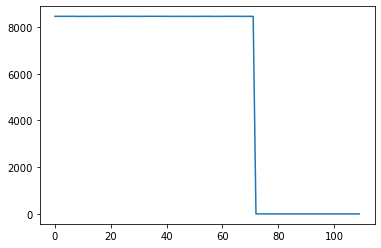

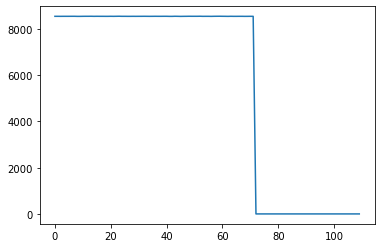

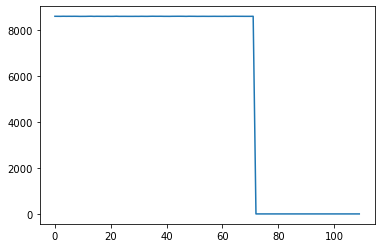

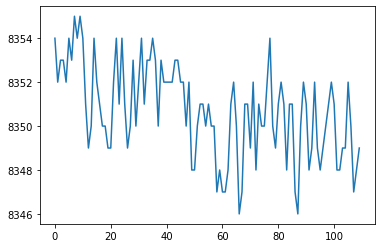

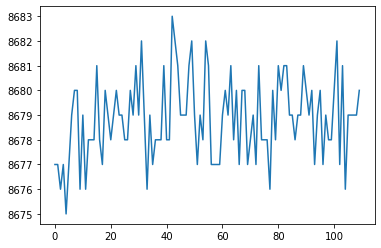

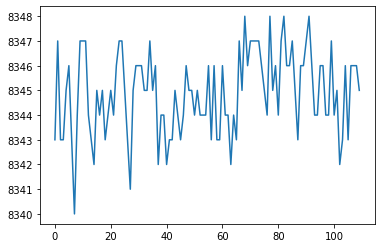

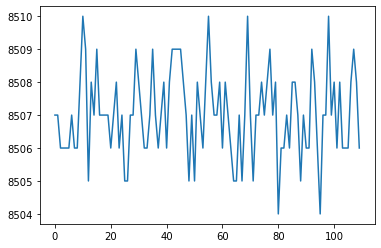

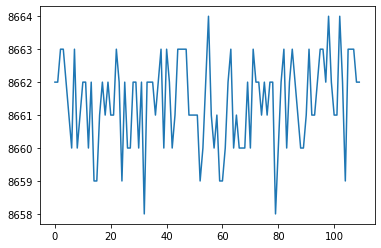

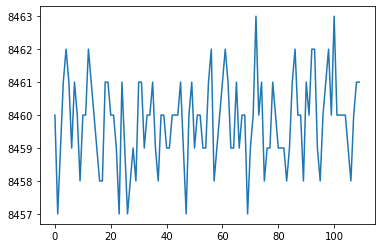

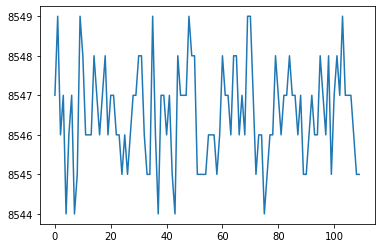

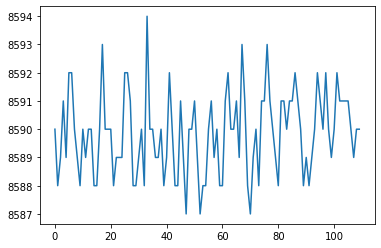

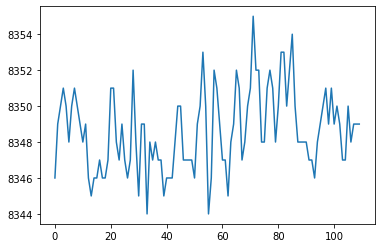

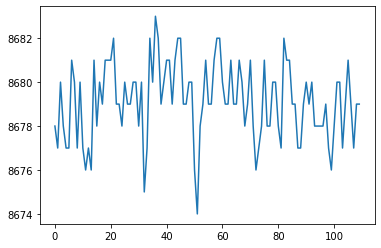

In [28]:
for r in records[:50]:
    plt.plot(r['data'])
    plt.show()

Dit is de meest rauwe data die we hebben, deze noemen we raw_records. Nu is de vraag wat er interestand is. Wat we graag willen is duidelijke pieken, maar dit is niet heel duidelijk.
De eerstvolgende stap heet records

In [29]:
records = ax.get_array(run_ids[5],'records')

/Users/petergaemers/Desktop/python/strax/strax/context.py:445: UserWarning: Option channel_map not taken by any registered plugin
  warnings.warn(f"Option {k} not taken by any registered plugin")
|██████████| 100.00 % [00:00<00:00], Rate last Chunk: 0.00 s/chunk, #chunks processed: 385


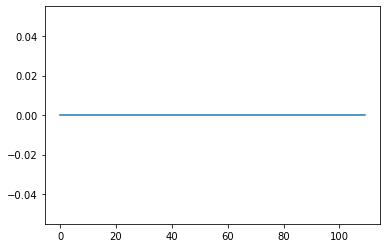

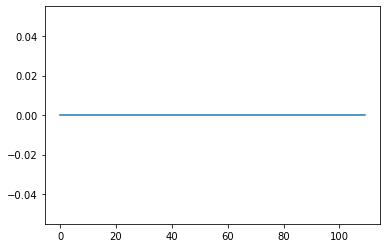

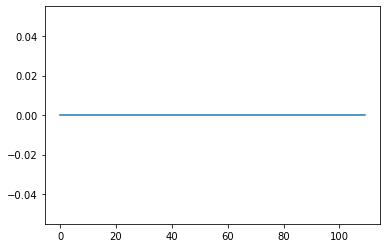

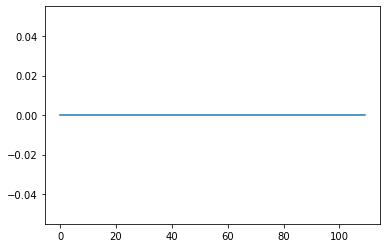

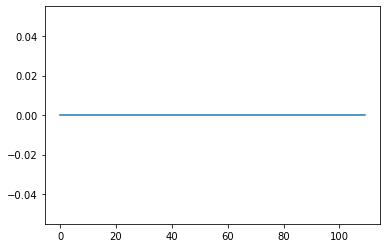

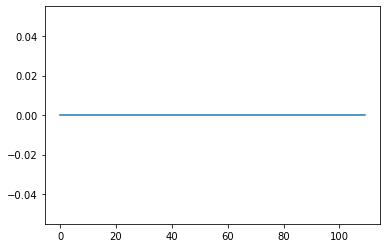

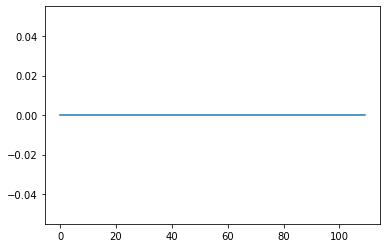

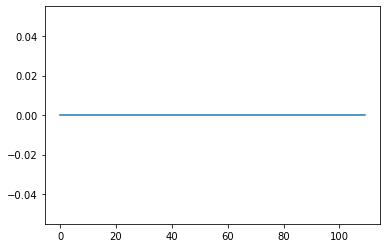

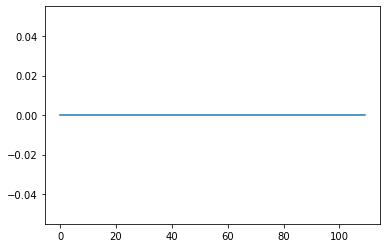

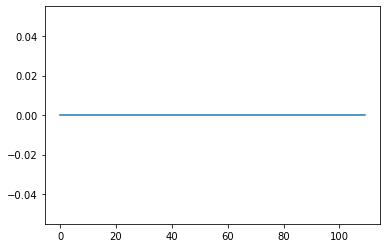

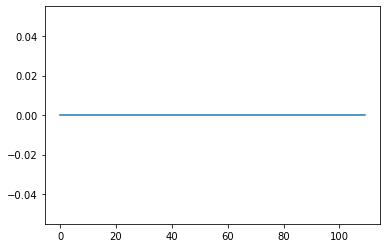

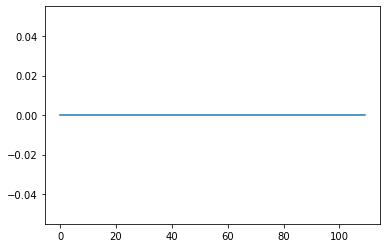

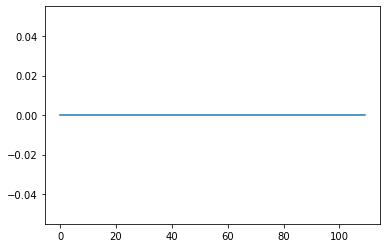

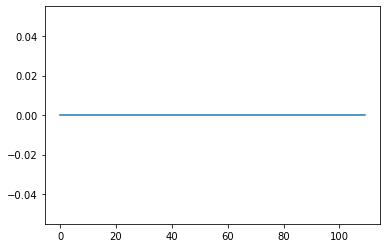

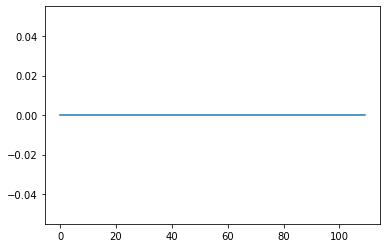

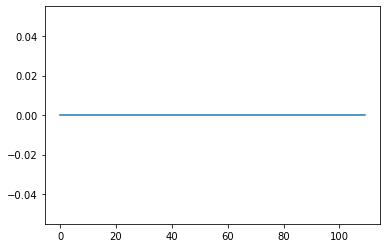

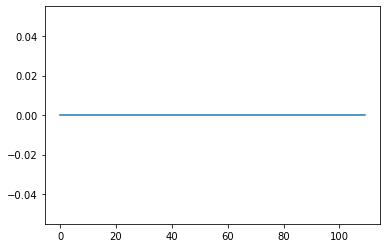

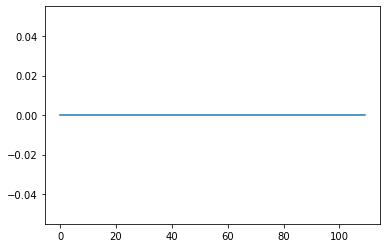

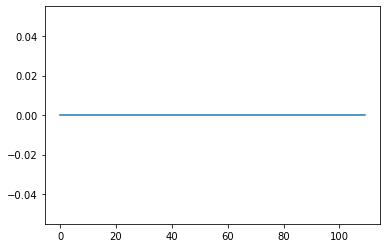

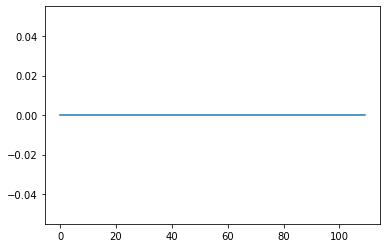

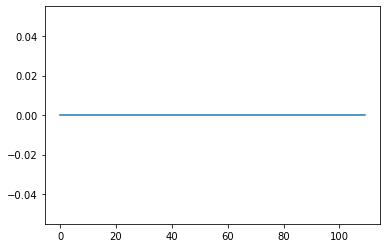

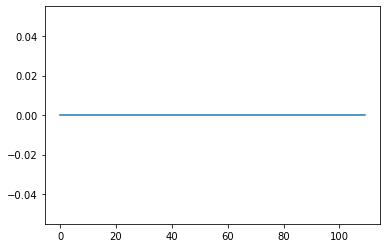

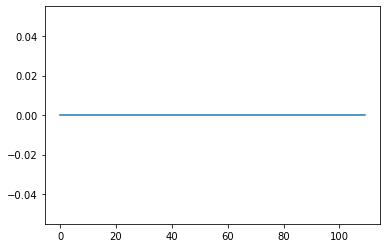

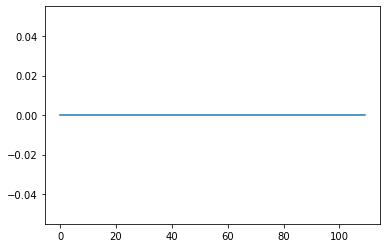

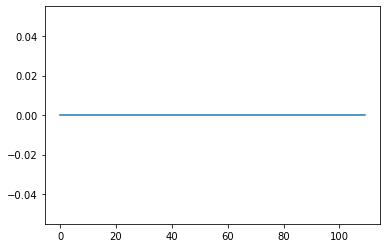

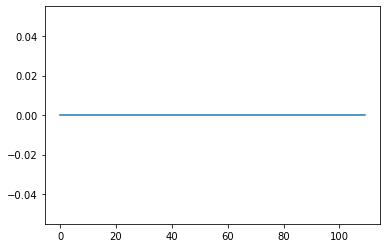

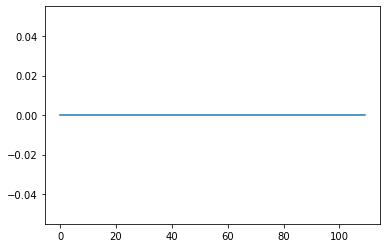

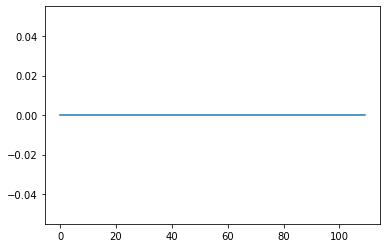

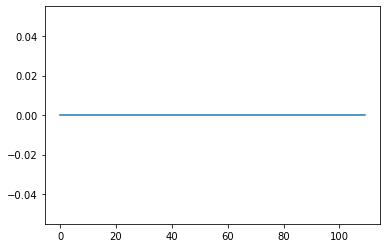

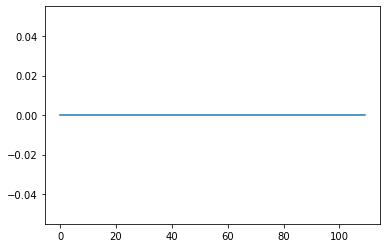

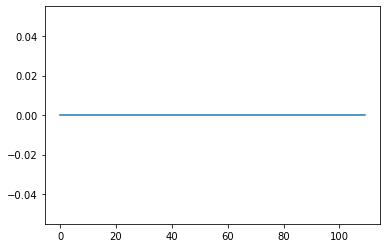

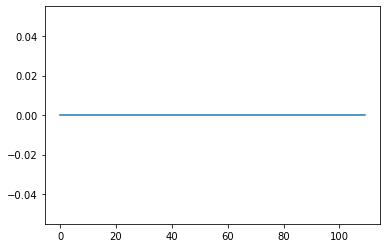

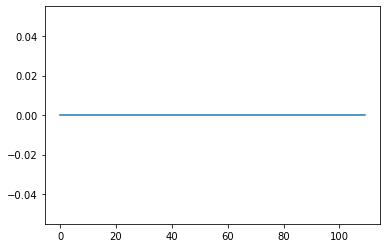

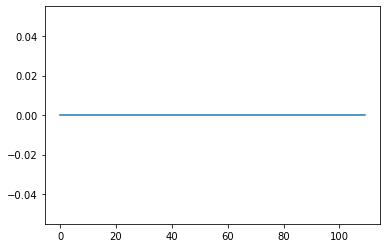

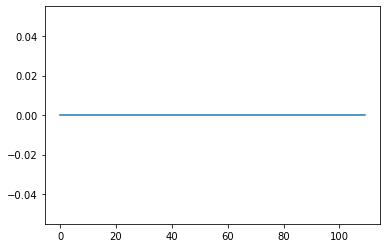

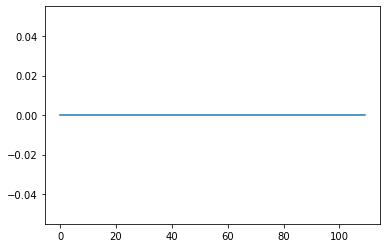

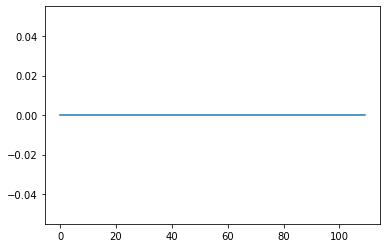

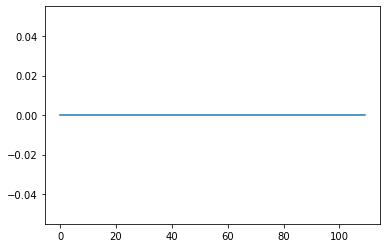

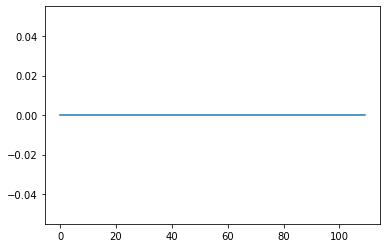

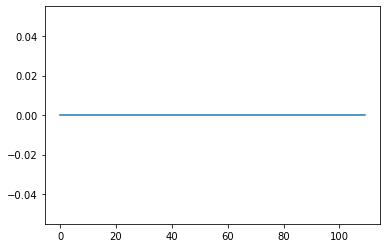

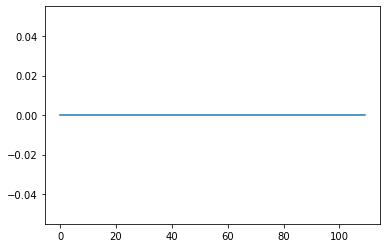

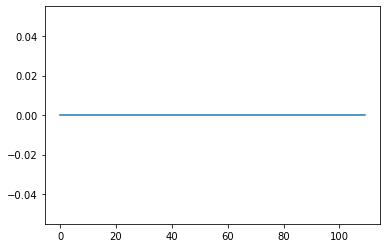

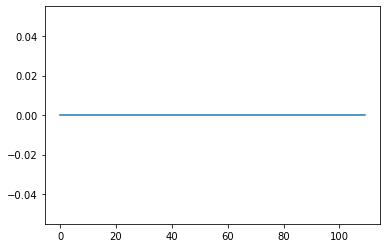

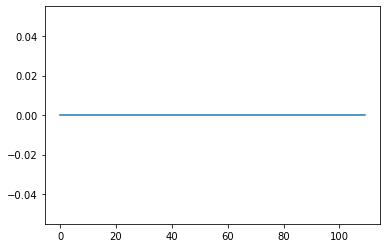

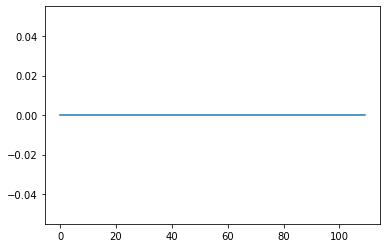

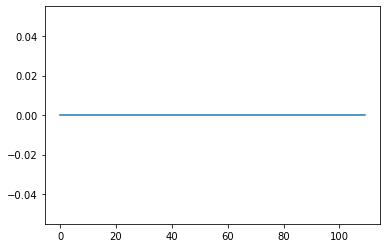

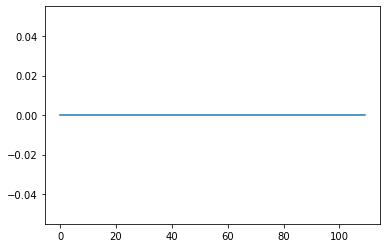

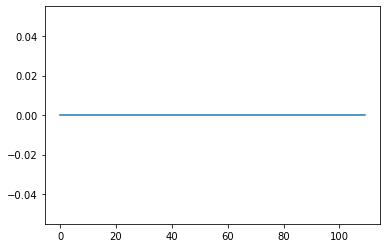

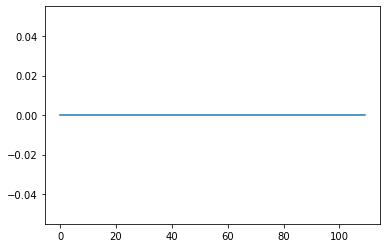

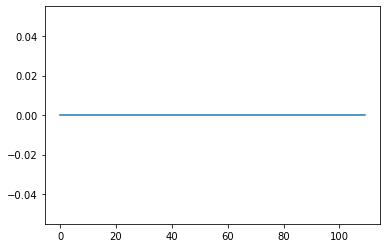

In [30]:
for r in records[:50]:
    plt.plot(r['data'])
    plt.show()

Dit ziet er totaal anders uit. De vraag is: Wat is er allemaal gebeurt? en waar kan je dat vinden?
    
De vervolg vraag is hoe krijgen we hier goede pieken uit? Dat is nu gesplits in top en bottom, maar dat hoeft niet meer. Probeer de plugin aan te passen om signalen van verschillende sensoren bij elkaar op te tellen.
Hiervoor hoef je veel minder te doen dan je misschien verwacht. Het voornaamste wat. je moet aanpassen is wat voor data je erin doet en wat je eruit wilt krijgen